# 02 — Exploratory Visualizations (Static)

In [1]:
# Ensure deps in active kernel
import sys, subprocess, importlib
def ensure(pkg):
    try:
        importlib.import_module(pkg)
    except Exception:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
ensure("pandas"); ensure("matplotlib")

In [2]:
import pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
ROOT = Path.cwd()
candidates = [ROOT.parent / "data/processed/fpds_cleaned.csv", ROOT / "data/processed/fpds_cleaned.csv"]
csv_path = next((p for p in candidates if p.exists()), None)
if csv_path is None:
    # fallback sample
    p = ROOT.parent / "data/processed"
    p.mkdir(parents=True, exist_ok=True)
    csv_path = p / "fpds_cleaned.csv"
    csv_path.write_text(
        "action_date,year_month,vendor_group,naics_code_clean,dollar_obligated,place_of_performance_state\n"
        "2021-07-15,2021-07,LOCKHEED MARTIN,336413,12000000,TX\n"
        "2021-07-10,2021-07,BOEING,336413,8000000,CA\n"
        "2022-01-02,2022-01,RAYTHEON,334111,2500000,AZ\n",
        encoding="utf-8"
    )
    print(f"[INFO] Created fallback cleaned sample at {csv_path}")
else:
    print(f"[INFO] Using cleaned dataset: {csv_path}")
df = pd.read_csv(csv_path, parse_dates=["action_date"])

[INFO] Using cleaned dataset: c:\Users\taylo\OneDrive\Desktop\DoD-SupplyChain-Disruption-Complete - Copy\data\processed\fpds_cleaned.csv


### Chart 1 — Monthly Contract Volume

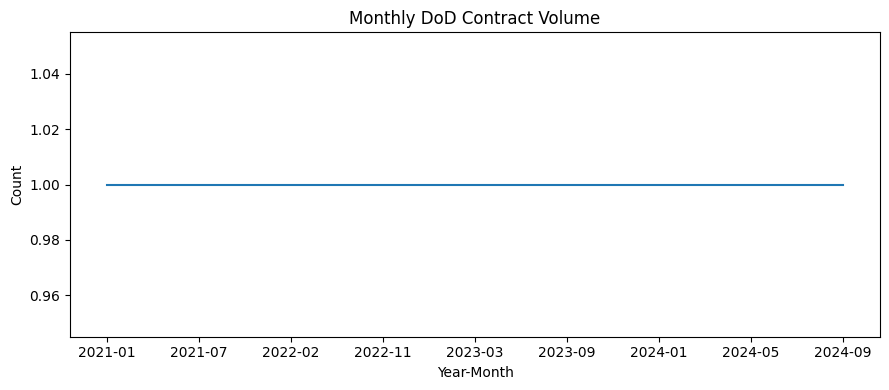

In [3]:
cnt = df["year_month"].value_counts().sort_index()
plt.figure(figsize=(9,4))
cnt.plot(kind="line")
plt.title("Monthly DoD Contract Volume")
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Chart 2 — Top Vendors by Count

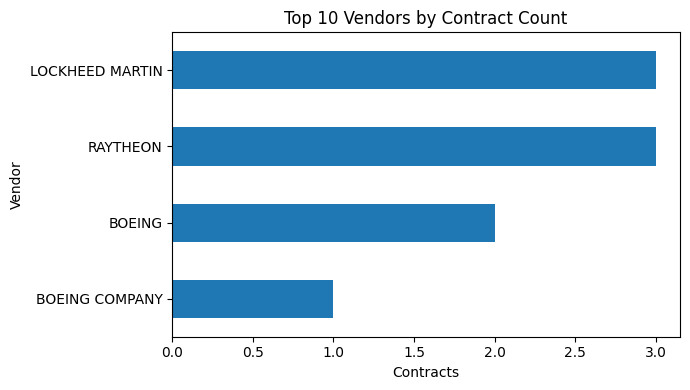

In [4]:
top = df["vendor_group"].value_counts().head(10).sort_values()
plt.figure(figsize=(7,4))
top.plot(kind="barh")
plt.title("Top 10 Vendors by Contract Count")
plt.xlabel("Contracts")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

### Chart 3 — Contract Value Distribution

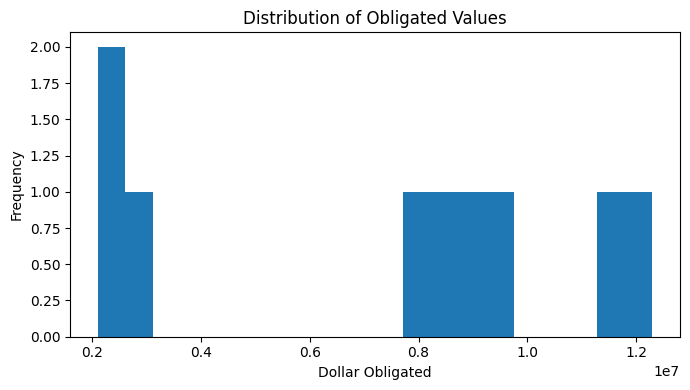

In [5]:
plt.figure(figsize=(7,4))
df["dollar_obligated"].dropna().plot(kind="hist", bins=20)
plt.title("Distribution of Obligated Values")
plt.xlabel("Dollar Obligated")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()